# PREDICTIVE ANALYSIS ON THE IMPACT OF ADVERTISING MEDIAS ON SALES

### Exploratory Data Analysis

In [352]:
# IMPORTING NECCESSARY PYTHON LIBRARIES PACKAGES

In [353]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [354]:
#Read CSV file and removing unwanted column


advert = pd.read_csv('Documents/advertising.csv', index_col = 0)
advert

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [355]:
#Ascessing Data information

advert.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [356]:
# Displays a descriptive statistics of Dataset
advert.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [357]:
advert.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [358]:
# To show the numbers of rows and columns in the Dataset
advert.shape

(200, 4)

In [359]:
#checking for Null Values

advert.isna().sum()

#Dataset does not contain any null value

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# This is to check for any outliers

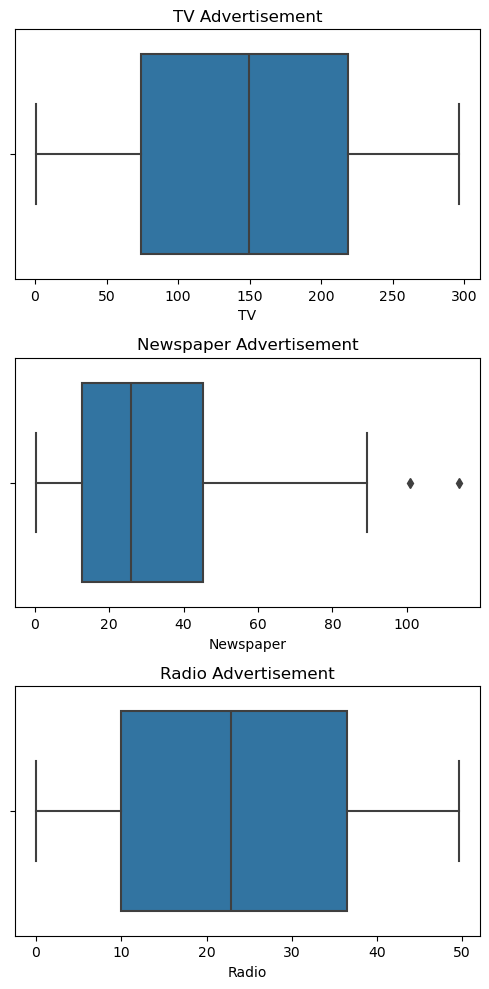

In [360]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots with 3 rows
fig, axs = plt.subplots(3, 1, figsize=(5, 10))  # Adjusted figsize for better visualization

# TV Boxplot
sns.boxplot(x=advert['TV'], ax=axs[0])  # Specify the x-axis for the boxplot
axs[0].set_title('TV Advertisement')

# Newspaper Boxplot
sns.boxplot(x=advert['Newspaper'], ax=axs[1])  # Specify the x-axis for the boxplot
axs[1].set_title('Newspaper Advertisement')

# Radio Boxplot
sns.boxplot(x=advert['Radio'], ax=axs[2])  # Specify the x-axis for the boxplot
axs[2].set_title('Radio Advertisement')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


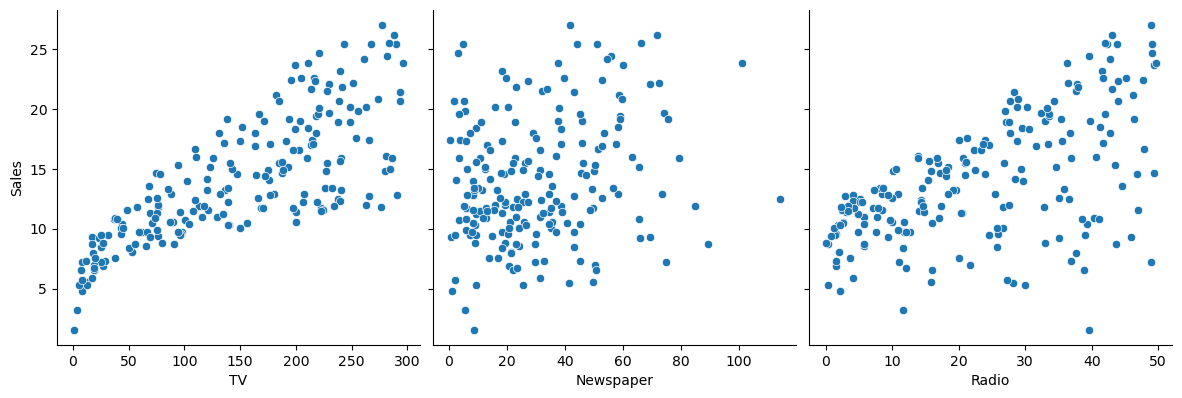

In [361]:
sns.pairplot(advert, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

## correlation of Each adverting media

In [362]:
advert.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [363]:
#TV is has a very strong correlation, therefore it best best platform to improve sales

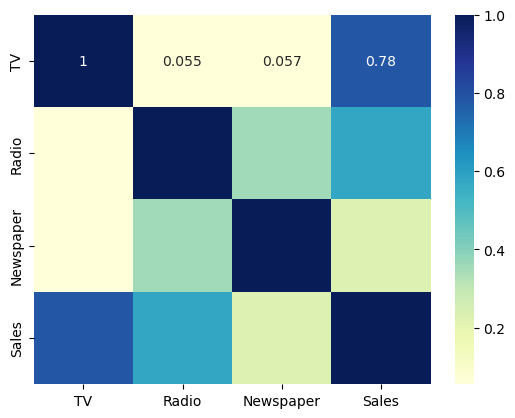

In [364]:
sns.heatmap(advert.corr(), cmap="YlGnBu", annot = True)
plt.show()

# predicting sales based on platforms 

In [365]:
#import train_test_split model
from sklearn.model_selection import train_test_split

In [366]:
X = advert.drop(['Sales','Newspaper','Radio'], axis = 1)
y = advert['Sales']
X

,TV
1,230.1
2,44.5
3,17.2
4,151.5
5,180.8
...,...
196,38.2
197,94.2
198,177.0
199,283.6


In [367]:
#train 80% of the data and reserve 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [368]:
advert_trained = X_train.join(y_train)
advert_trained

,TV,Sales
80,116.0,11.0
198,177.0,12.8
39,43.1,10.1
25,62.3,9.7
123,224.0,11.6
...,...,...
107,25.0,7.2
15,204.1,19.0
93,217.7,19.4
180,165.6,12.6


In [369]:
X_test.join(y_test).shape

(40, 2)

In [370]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)
reg.score(X_train,y_train)

0.5911667812043271

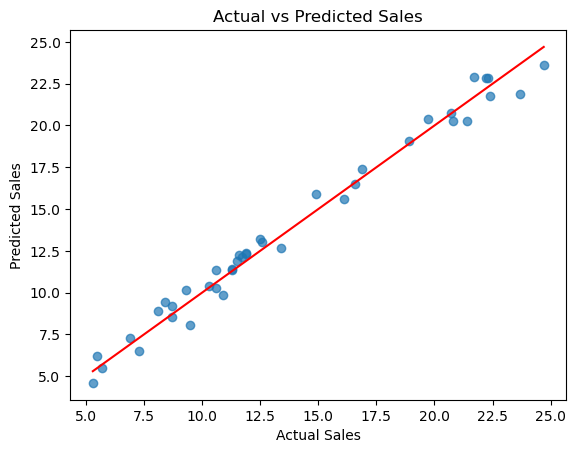

In [371]:
#properly displays scattered plot for sales based on TV Platform
plt.scatter(y_test, y_pred, alpha=0.7)

#shows a straight line plot indicating fits of data points
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

#labels the horizontal axis as Actual sales
plt.xlabel("Actual Sales")

#labels the vertical axis as Predicted sales
plt.ylabel("Predicted Sales")

#adds title to data set
plt.title("Actual vs Predicted Sales")

#displays the plot
plt.show() 

### Prediction of Sales based on Linear Model

In [372]:
y_pred = reg.predict(X_test)
comparison_df = pd.DataFrame({ "Predicted Sales": y_pred[:16],"Actual Sales": y_test[:16].values})

# Display the DataFrame in a clean format
print(comparison_df.to_string(index=False))

 Predicted Sales  Actual Sales
       14.717944          16.9
       16.211548          22.4
       20.748197          21.4
        7.664036           7.3
       17.370139          24.7
       10.614021          12.6
       17.207285          22.3
        9.446125           8.4
       17.467851          11.5
       15.266995          14.9
        8.585325           9.5
        9.734609           8.7
       18.030861          11.9
        7.370899           5.3
       13.610536          10.3
       15.038999          11.7


In [373]:
from sklearn.ensemble import RandomForestRegressor  # Use RandomForestClassifier for classification
from sklearn.model_selection import train_test_split


# Initialize the Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42)  # Use RandomForestClassifier for classification tasks

# Train the model
rf_reg.fit(X_train, y_train)

# Get the R-squared score on the training set
train_score = rf_reg.score(X_train, y_train)

# Get the R-squared score on the testing set
test_score = rf_reg.score(X_test, y_test)
train_score



0.8993053714328938

In [374]:
test_score

0.7116102412653466

In [375]:
y_pred = rf_reg.predict(X_test)
comparison_df = pd.DataFrame({ "Predicted Sales": y_pred[:16],"Actual Sales": y_test[:16].values})

# Display the DataFrame in a clean format
print(comparison_df.to_string(index=False))

 Predicted Sales  Actual Sales
         16.6150          16.9
         17.8380          22.4
         19.9280          21.4
          5.6050           7.3
         19.5060          24.7
         13.3060          12.6
         20.9990          22.3
         10.2000           8.4
         12.6920          11.5
         14.4351          14.9
          7.8150           9.5
         11.1060           8.7
         14.0100          11.9
          4.4020           5.3
         12.6230          10.3
         16.9470          11.7


# Prediction of Sales based on TV as advertising Platform

### Model Evaluation

In [376]:
from sklearn.metrics import mean_squared_error
r_squared = reg.score(X_test,y_test)
rmse = mean_squared_error(y_test,y_pred, squared = False)
rmse
r_squared


0.6766954295627077

In [377]:
rmse

3.017054389029325

## Cross Validation of Model

In [378]:
from sklearn.model_selection import cross_val_score,KFold
kf = KFold(n_splits = 6, shuffle = True, random_state = 42)
reg = LinearRegression()
cv_results = cross_val_score(reg, X,y,cv = kf)
print(cv_results)

[0.65772346 0.573892   0.67795357 0.60047754 0.5114863  0.48037784]


In [379]:
print(np.mean(cv_results),np.std(cv_results))

0.5836517842445011 0.07145064177755119


In [380]:
print(np.quantile(cv_results,[0.025,0.975]))

[0.48426639 0.67542481]


In [381]:
X = advert.drop(['Sales','TV','Newspaper'], axis = 1)
y = advert['Sales']
X.head()


,Radio
1,37.8
2,39.3
3,45.9
4,41.3
5,10.8


In [382]:
#Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [383]:
advert_trained = X_train.join(y_train)
advert_trained

,Radio,Sales
80,7.7,11.0
198,9.3,12.8
39,26.7,10.1
25,12.6,9.7
123,2.4,11.6
...,...,...
107,11.0,7.2
15,32.9,19.0
93,33.5,19.4
180,10.0,12.6


In [384]:
X_test.join(y_test).shape

(40, 2)

In [385]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train,y_train)

reg.score(X_train,y_train)

0.35090564286715287

In [386]:
reg.fit(X_test,y_test)

LinearRegression()

In [387]:
reg.score(X_test, y_test)


0.28303564431918216

### Scattered plot to show Linear Regression of data points

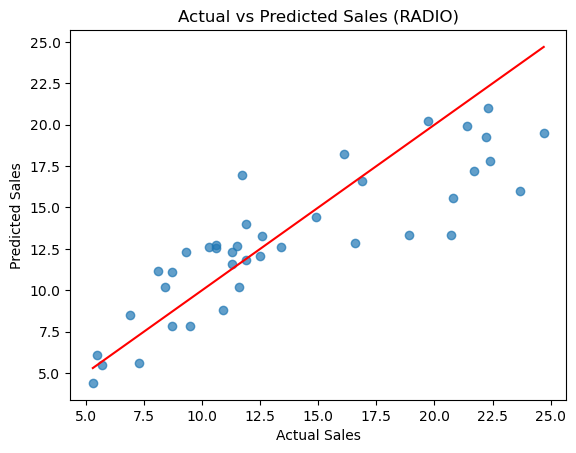

In [388]:
#properly displays scattered plot for sales based on TV Platform
plt.scatter(y_test, y_pred, alpha=0.7)

#shows a straight line plot indicating fits of data points
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

#labels the horizontal axis as Actual sales
plt.xlabel("Actual Sales")

#labels the vertical axis as Predicted sales
plt.ylabel("Predicted Sales")

#adds title to data set
plt.title("Actual vs Predicted Sales (RADIO)")

#displays the plot
plt.show() 

## Model Building with RandomForestRegressor

In [389]:
y_pred = reg.predict(X_test)
comparison_df = pd.DataFrame({ "Predicted Sales": y_pred[:16],"Actual Sales": y_test[:16].values})

# Display the DataFrame in a clean format
print(comparison_df.to_string(index=False))

 Predicted Sales  Actual Sales
       15.072130          16.9
       18.299560          22.4
       14.410607          21.4
       16.134576           7.3
       18.560160          24.7
       15.753699          12.6
       17.537806          22.3
       11.062900           8.4
        9.419116          11.5
       13.247931          14.9
       13.668900           9.5
        9.880178           8.7
        9.419116          11.9
       14.731345           5.3
        9.158516          10.3
       10.301147          11.7


In [390]:
from sklearn.ensemble import RandomForestRegressor  # Use RandomForestClassifier for classification
from sklearn.model_selection import train_test_split


# Initialize the Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42)  # Use RandomForestClassifier for classification tasks

# Train the model
rf_reg.fit(X_train, y_train)

# Get the R-squared score on the training set
train_score = rf_reg.score(X_train, y_train)

# Get the R-squared score on the testing set
test_score = rf_reg.score(X_test, y_test)
test_score

0.12536516474278958

## Prediction Based on Model

In [391]:
y_pred = rf_reg.predict(X_test)

comparison_df = pd.DataFrame({ "Predicted Sales": y_pred[:16],"Actual Sales": y_test[:16].values})

# Display the DataFrame in a clean format
print(comparison_df.to_string(index=False))

 Predicted Sales  Actual Sales
        16.63100          16.9
        16.01850          22.4
        15.66050          21.4
        16.67800           7.3
        21.77170          24.7
        12.14600          12.6
        20.73600          22.3
         5.65000           8.4
        11.59535          11.5
        14.67900          14.9
        16.56800           9.5
        10.67295           8.7
        11.59535          11.9
        16.19600           5.3
         7.21300          10.3
        10.96800          11.7


## Model Evaluation

In [392]:
#import neccesary library for model evaluation
from sklearn.metrics import mean_squared_error
r_squared = reg.score(X_test,y_test)
rmse = mean_squared_error(y_test,y_pred, squared = False)
rmse
r_squared

0.28303564431918216

In [393]:
rmse

5.254200093226062

In [394]:
X = advert.drop(['Sales','TV','Radio'], axis = 1)
y = advert['Sales']


In [395]:
#Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [396]:
advert_trained = X_train.join(y_train)
advert_trained.head(7)

,Newspaper,Sales
80,23.1,11.0
198,6.4,12.8
39,35.1,10.1
25,18.3,9.7
123,15.6,11.6
196,13.8,7.6
30,40.8,10.5


In [397]:
#join the test data for feature and Target value
X_test.join(y_test).head()

,Newspaper,Sales
96,52.9,16.9
16,52.9,22.4
31,43.2,21.4
159,45.2,7.3
129,3.2,24.7


In [398]:
#import the model
from sklearn.linear_model import LinearRegression

#instantiate the model
reg = LinearRegression()

#fit the model
reg.fit(X_train,y_train)

#check how well it performs
reg.score(X_train,y_train)


0.05658396829234358

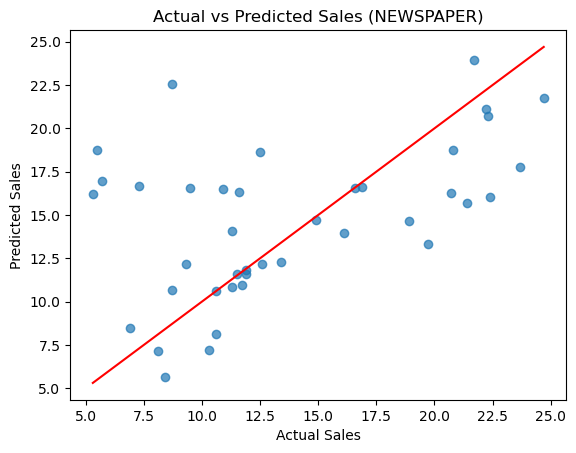

In [399]:

#properly displays scattered plot for sales based on TV Platform
plt.scatter(y_test, y_pred, alpha=0.7)

#shows a straight line plot indicating fits of data points
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

#labels the horizontal axis as Actual sales
plt.xlabel("Actual Sales")

#labels the vertical axis as Predicted sales
plt.ylabel("Predicted Sales")

#adds title to data set
plt.title("Actual vs Predicted Sales (NEWSPAPER)")

#displays the plot
plt.show() 

In [400]:
y_pred = reg.predict(X_test)
comparison_df = pd.DataFrame({ "Predicted Sales": y_pred[:16],"Actual Sales": y_test[:16].values})

# Display the DataFrame in a clean format
print(comparison_df.to_string(index=False))

 Predicted Sales  Actual Sales
       15.471678          16.9
       15.471678          22.4
       14.892038          21.4
       15.011551           7.3
       12.501770          24.7
       15.459726          12.6
       13.935931          22.3
       13.410072           8.4
       13.093361          11.5
       14.192884          14.9
       12.442013           9.5
       14.085322           8.7
       17.377916          11.9
       12.872261           5.3
       13.900076          10.3
       14.413984          11.7


In [401]:
from sklearn.ensemble import RandomForestRegressor  # Use RandomForestClassifier for classification
from sklearn.model_selection import train_test_split


# Initialize the Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42)  # Use RandomForestClassifier for classification tasks

# Train the model
rf_reg.fit(X_train, y_train)

# Get the R-squared score on the training set
train_score = rf_reg.score(X_train, y_train)

# Get the R-squared score on the testing set
test_score = rf_reg.score(X_test, y_test)
test_score
train_score

0.7222137322868647

In [402]:
#predict on the test set
y_pred = rf_reg.predict(X_test)

#compare the results for actual and predicted sales
comparison_df = pd.DataFrame({ "Predicted Sales": y_pred[:16],"Actual Sales": y_test[:16].values})

# Display the DataFrame in a clean format
print(comparison_df.to_string(index=False))

 Predicted Sales  Actual Sales
       18.531000          16.9
       18.531000          22.4
        9.770667          21.4
       15.380000           7.3
       15.557883          24.7
       18.531000          12.6
       14.459000          22.3
       13.908000           8.4
       14.954000          11.5
       11.626607          14.9
       16.004000           9.5
        9.245333           8.7
       16.411000          11.9
       13.060143           5.3
       13.699000          10.3
       11.097500          11.7


In [403]:
#import library for model evaluation

from sklearn.metrics import mean_squared_error,r2_score
r_squared = reg.score(X_test,y_test)
rmse = mean_squared_error(y_test,y_pred, squared = False)
rmse
r_squared

0.029871749149522397

In [404]:
rmse

6.173140667201752

In [405]:
#Validating the model
from sklearn.model_selection import cross_val_score,KFold
kf = KFold(n_splits = 6, shuffle = True, random_state = 42)
rf_reg = RandomForestRegressor()  # Use RandomForestClassifier for classification tasks

cv_results = cross_val_score(rf_reg, X,y,cv = kf)
print(cv_results)

[-0.30963725 -0.26279991 -0.63934978 -0.58991392 -0.29526878 -0.08425412]


# Comments based on Analysis

##### The Aim is to determine which advertising media will drive sales better
##### Based on finding TV tends to fit into this condition, why?

1. It has the strongest correlation with sales
2. It has the highest value when fit into the models I used
3. TV has R-squared value of 0.6766954295627077 which is very close to 1 compared to the others, indicating it has a better prediction too.
